In [49]:
import pandas as pd
import seaborn as sns

In [18]:
data_raw = pd.read_csv('data_raw.csv').drop('Unnamed: 0', axis=1)
data_raw

,rcsb_id,resolution,matthews,percent_solvent,method,pH,temp,organism,sequence,conditions
0,101M,2.07,3.09,60.20,NaN,9.0,NaN,Physeter catodon,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ..."
1,102L,1.74,2.75,55.28,NaN,NaN,NaN,Escherichia virus T4,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,NaN
2,102M,1.84,3.09,60.20,NaN,9.0,NaN,Physeter catodon,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ..."
3,103L,1.90,2.70,54.46,NaN,NaN,NaN,Escherichia virus T4,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,NaN
4,103M,2.07,3.09,60.30,NaN,9.0,NaN,Physeter catodon,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ..."
...,...,...,...,...,...,...,...,...,...,...
118775,9RSA,1.80,2.25,45.45,NaN,NaN,NaN,Bos taurus,KETAAAKFERQHMDSSTSAASSSNYCNQMMKSRNLTKDRCKPVNTF...,NaN
118776,9RUB,2.60,2.38,48.29,NaN,NaN,NaN,Rhodospirillum rubrum,MDQSSRYVNLALKEEDLIAGGEHVLCAYIMKPKAGYGYVATAAHFA...,NaN
118777,9WGA,1.80,2.50,50.76,NaN,NaN,NaN,Triticum aestivum,QRCGEQGSNMECPNNLCCSQYGYCGMGGDYCGKGCQNGACWTSKRC...,NaN
118778,9XIA,1.90,2.79,55.93,NaN,NaN,NaN,Streptomyces rubiginosus,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 96706 entries, 0 to 118760
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rcsb_id          96706 non-null  object 
 1   resolution       96706 non-null  float64
 2   matthews         96706 non-null  float64
 3   percent_solvent  96706 non-null  float64
 4   organism         96706 non-null  object 
 5   sequence         96706 non-null  object 
 6   conditions       96706 non-null  object 
 7   cond_len         96706 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 6.6+ MB


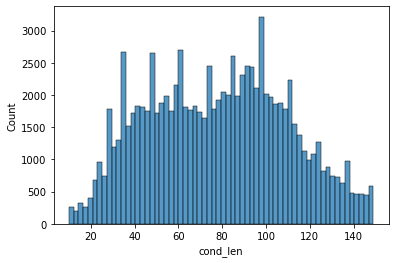

In [71]:
data_process = data_raw.drop(['method','temp'], axis=1)
data_process = data_process.dropna(axis=0)

data_process['cond_len'] = data_process['conditions'].str.len()
data_process = data_process[data_process['cond_len'] > 9]
sns.histplot(data_process['cond_len'])
data_process.info()

In [77]:
data_clean = data_process.drop('cond_len', axis=1).reset_index()
data_clean
data_clean.to_csv('data_temp1.csv')